1. 지도학습 with labeled data 
- 분류(Classification)
    - 의사결정트리 DecisionTreeClassifier
- 회귀(Regression) 
    - 선형회귀 Linear Regression

In [6]:
import pandas as pd
import numpy as np

Chapter 01 | 파이썬 기반의 머신러닝과 생태계 이해
======

In [6]:
titanic_df = pd.read_csv("train.csv")
#titanic_df.describe()
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)  # only defined by series Q1.시리즈의 인덱스틑 어떻게 추출?
print(value_counts.index) # A1(pp.57:index객체)

3    491
1    216
2    184
Name: Pclass, dtype: int64
Int64Index([3, 1, 2], dtype='int64')


In [11]:
titanic_pclass = titanic_df['Pclass']
# print(titanic_pclass)
# print(type(titanic_pclass))
titanic_pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [50]:
titanic_df['Age_0']=0
#titanic_df.head(3)
titanic_df['Age_by_10']=titanic_df['Age']*10
titanic_df['Family_No']=titanic_df['SibSp']+titanic_df['Parch']+1
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, ...",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings,...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,Heikkine...,female,26.0,0,0,STON/O2....,7.9250,NaN,S,0,260.0,1


In [51]:
drop_result = titanic_df.drop(['Age_0','Age_by_10','Family_No'], axis=1, inplace=True)
print('inplace=False로 drop 후 반환된 값 : ', drop_result)
titanic_df.head(3)

inplace=False로 drop 후 반환된 값 :  None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, ...",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings,...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkine...,female,26.0,0,0,STON/O2....,7.9250,NaN,S


In [52]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 12)
print('### before axis 0 drop ###')
print(titanic_df.head(3))
print('### after axis 0 drop ###')
drop = titanic_df.drop([0,1,2], axis=0, inplace=False)
print(drop)

### before axis 0 drop ###
   PassengerId  Survived  Pclass         Name     Sex   Age  SibSp  Parch       Ticket     Fare Cabin Embarked
0            1         0       3  Braund, ...    male  22.0      1      0    A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings,...  female  38.0      1      0     PC 17599  71.2833   C85        C
2            3         1       3  Heikkine...  female  26.0      0      0  STON/O2....   7.9250   NaN        S
### after axis 0 drop ###
     PassengerId  Survived  Pclass         Name     Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked
3              4         1       1  Futrelle...  female  35.0      1      0      113803  53.1000  C123        S
4              5         0       3  Allen, M...    male  35.0      0      0      373450   8.0500   NaN        S
5              6         0       3  Moran, M...    male   NaN      0      0      330877   8.4583   NaN        Q
6              7         0       1  McCarthy...    male

In [5]:
## pp.64
data = {'Name' : ['Chulmin', 'Eunkyung', 'Jinwoong', 'Soobeom'],
       'Year' : [2011, 2016, 2015, 2015],
       'Gender' : ['Male', 'Female', 'Male', 'Male']
       }

data_df = pd.DataFrame(data, index=['one', 'two', 'three', 'four'])
data_df

,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [44]:
## Boolean Indexting (pp.72)
titanic_df = pd.read_csv('train.csv')
titanic_boolean = titanic_df[titanic_df['Age']>60]
#titanic_boolean
# titanic_boolean[['Name', 'Age']].head(3) ## over 2 columns : [[]]
# titanic_boolean.loc[:,['Name', 'Age']].head(3)
# titanic_df.loc[titanic_df['Age']>60, ['Name', 'Age']].head(3)
titanic_df[(titanic_df['Age']>60) & (titanic_df['Pclass']==1) & (titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [79]:
## Sort/Aggregation/Group-by (pp.75)
titanic_sorted = titanic_df.sort_values(by=['Pclass','Name'],ascending=False)
# titanic_df[['Age', 'Fare']].mean()
titanic_groupby = titanic_df.groupby(by='Pclass')
# titanic_groupby.count()
data = {'Passengers': titanic_groupby['PassengerId'].count(),
       'Age' : titanic_groupby['Age'].mean(),
        'Survived' : titanic_groupby['Survived'].mean(),
        'Fare' : titanic_groupby['Fare'].mean()
 }
Practice = pd.DataFrame(data)
# Practice
# titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId','Survived']].count()
# titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId']].count()
# titanic_groupby

# titanic_df.groupby('Pclass')['Age'].agg([max, min])
agg_format = {'PassengerId':'count', 'Survived':'mean','Age':'mean', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,PassengerId,Survived,Age,Fare
Pclass,,,,
1,216,0.629630,38.233441,84.154687
2,184,0.472826,29.877630,20.662183
3,491,0.242363,25.140620,13.675550


In [88]:
## Missing Data (pp.79)
titanic_df.isna()
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
titanic_df['Cabin'].fillna('C000', inplace=True)
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Embarked'].fillna('S', inplace=True)
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [101]:
## Apply Lambda (pp.82)
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name','Name_len']]

titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x<=15 else 'Adult')
titanic_df[['Age', 'Child_Adult']]

titanic_df['Age_Cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x<=15 else ('Adult' if x<=60 else 'Elderly'))
titanic_df['Age_Cat'].value_counts()

Adult      786
Child       83
Elderly     22
Name: Age_Cat, dtype: int64

In [106]:
def get_category(age):
    cat = ''
    if age<=5 : cat='Baby'
    elif age<=12 : cat='Child'
    elif age<=18 : cat='Teenager'
    elif age<=25 : cat ='Student'
    elif age<=35 : cat = 'Young Adult'
    elif age<=60 : cat = 'Adult'
    else : cat ='Elderly'
    return cat

titanic_df['Age_Cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age', 'Age_Cat']].head()
titanic_df['Age_Cat'].value_counts()

Young Adult    373
Adult          195
Student        162
Teenager        70
Baby            44
Child           25
Elderly         22
Name: Age_Cat, dtype: int64

# Chapter 02 | 사이킷런으로 시작하는 머신러닝

## 01. 사이킷런 (scikit-learn, sklearn)
- sklearn.datasets : 데이터세트 생성 모듈 모임
- sklearn.tree : 트리기반 ML 알고리즘 클래스 모임
- sklearn.model_selection : 학습/검증/예측 데이터 분리 및 평가 모듈의 모임

cf. 하이퍼 파라미터
머신러닝 알고니즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭, 알고리즘의 성능을 튜닝

## 02. 붓꽃 품종 예측하기

In [4]:
import sklearn

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # 머신러닝 분류 알고리즘 '의사결정트리클래스'
from sklearn.model_selection import train_test_split

import pandas as pd
iris = load_iris()
# sns.load_dataset("iris")

In [32]:
print(dir(iris))
print(load_iris().keys())

# data : 데이터 가져오기
print(iris.data[:5])
print(type(iris.data)) 
print()

# feature 레이블 가져오기
print(iris.feature_names)
print(type(iris.feature_names)) 
print()

# filepath & filename 가져오기
print(iris.filename)
print()

# ???
print(iris.frame)
print()

# 분류할 카데고리 데이터 가져오기
print(iris.target)
print()

# 분류할 카테고리 이름 가져오기
print(iris.target_names)
print(type(iris.target_names))


['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
<class 'numpy.ndarray'>

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'list'>

/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/data/iris.csv

None

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'>


In [19]:
iris_data = iris.data

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris_label = iris.target 

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 데이터셋 분류 
- 레이블된 데이터셋이 한정되어 있을 때 훈련할 데이터와 테스트할 데이터를 분리시킴

| |훈련|테스트|비고|
|---|---|---|---|
|__정보__|X_train|X_test|sepal/petal_length/width| 
|__예측__|y_train|y_test|0(setosa), 1(versicolor), 2(virginica)|



In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)
# random_state:난수 발생 고정 = seed

- DecisionTree 객체 할당 및 학습 수행

In [23]:
tree = DecisionTreeClassifier(random_state=11) # random_state:동일한 학습/예측 결과 출력
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=11)

- 예측 수행

In [24]:
pred = tree.predict(X_test)

- 성능 평가
- 정확도 : 맞힌 갯수/테스트 데이터 갯수

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9333333333333333

## summary
1. 데이터 세트 분리   
```
    train_test_split(data, label, test_size, random_state)
```

2. 모델 학습
* 객체 생성
```
    DecisionTreeClassifer(random_state)
```
* 학습 수행
```
    fit(train_set)
```

3. 예측 수행
```
    predict(test_data)
```

4. 평가
```
    accuracy_score(test_label, predict)
    

## 03. 사이킷런의 기반 프레임워크 익히기

- Estimator : 지도학습의 모든 알고리즘을 구현한 클래스
    - 메서드 
        - fit()
        - predict()

    - Estimator를 인자로 받는 함수들
        - cross_val_score() : 평가 함수
        - GridSearchCV() : 하이퍼 파라미터 튜닝을 지원하는 클래스 
        
        
- 비지도학습인 차원 축소, 클러스터링, 피처 추출 등을 구현한 클래스
    - 메서드
        - fit() : 입력 데이터 형태에 맞춰 데이터를 변환하기 위해 사전 구조를 맞추는 작업으로 지도학습에서의 fit()과는 차이가 있다.  *데이터 전처리? 같은 느낌인가?*   
        - transform() : 차원 축소, 클러스터링, 피처 추출 등 실제 작업
        - fit_transform() = fit() + transform() but, 사용에 주의 필요!
        - predict()
        
### 사이킷런의 주요 모듈
p.94

### 내장된 예제 데이터 세트
p. 96


## 04. Model Selection 모듈 소개
학습/테스트 데이터 세트 분리, 교차 검증 분할 및 평가, Estimator의 파라미터 튜닝을 위한 함수와 클래스 제공
### train_test_split()
1. [test] 학습/테스트 데이터 세트를 분리하지 않았을 때
    - 결과 : 정확도 100%
    - 이유 : 학습한 데이터 기반으로 테스트하였기 때문에

In [34]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
tree = DecisionTreeClassifier()

train_data = iris.data
train_label = iris.target

tree.fit(train_data, train_label)

pred = tree.predict(train_data)
accuracy_score(train_label, pred)


1.0


#### train_test_split() 속성
- test_size : 전체 데이터 중 테스트 데이터 세트로 얼마나 나눌 것인가(default=0.25)
- train_size : 
- shuffle : 분리하기 전에 데이터를 미리 섞을지, 데이터 분산시켜 효율적인 학습/테스트 데이터 세트 생성 (default=True)
- random_state : 동일한 학습/테스트용 데이터 세트를 생성하기 위해서 주어지는 난수값, 값을 지정해주지 않으면 수행할 때마다 다른 학습/테스트용 데이터를 생성
- 반환값 : tuple (학습용/테스트용 피처 데이터 세트, 학습용/테스트용 레이블 데이터 세트)


2. 학습/테스트 데이터 세트를 분리하기


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier()

iris = load_iris()
iris_data = iris.data
iris_target = iris.target

X_train,X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.3, random_state=121)

tree.fit(X_train, y_train)
pred = tree.predict(X_test)
accuracy_score(y_test, pred)


0.9555555555555556

### 교차 검증

고정된 학습 데이터와 테스트 데이터로 평가하다보면 테스트 데이터에만 최적의 성능을 발휘하고 새로운 데이터에 대한 예측 성능이 과도하게 떨어지는 과적합(overfitting)이 발생할 수 있다. 이러한 문제점을 개선하기 위해 여러 세트로 구성된 학습 데이터와 검증 데이터 세트에서 학습과 평가를 진행하는 __교차 검증__ 을 이용한다. 테스트 데이터로 예측하기 전에 1차적으로 평가하는 것이다. 각 세트에서 수행한 결과에 따라서 하이퍼 파라미터 튜닝 등 모델 최적화를 더욱 손쉽게 할 수 있다. 

## K 폴드 교차 검증
K 개의 데이터 폴드 세트를 만들어서 K 번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행
- KFold, StratifiedKFold 클래스 사용

#### 5 폴드 교차 검증

In [118]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
tree = DecisionTreeClassifier(random_state=156)

# KFold 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print("데이터셋 크기 :", features.shape[0])


데이터셋 크기 : 150


In [8]:
n_iter = 0

# KFold 객체의 split() 호출하면 홀드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    n_iter += 1
    
    # 반복할 때마다 정확도 측정
    acc = np.round(accuracy_score(y_test, pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    cv_accuracy.append(acc)
    
    print("{}. 정확도 : {}, 학습데이터 크기 : {}, 검증데이터 크기 : {}".format(n_iter,acc, train_size, test_size))
    print("{}. 검증 세트 인덱스 : {}".format(n_iter, test_index))
    print()
    
print("평균 검증 정확도 : %.5f"%np.mean(cv_accuracy))  

1. 정확도 : 1.0, 학습데이터 크기 : 120, 검증데이터 크기 : 30
1. 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2. 정확도 : 0.9667, 학습데이터 크기 : 120, 검증데이터 크기 : 30
2. 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3. 정확도 : 0.8667, 학습데이터 크기 : 120, 검증데이터 크기 : 30
3. 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4. 정확도 : 0.9333, 학습데이터 크기 : 120, 검증데이터 크기 : 30
4. 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5. 정확도 : 0.7333, 학습데이터 크기 : 120, 검증데이터 크기 : 30
5. 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

평균 검증 정확도 : 0.90000


## Stratified K 폴드

예) 대출 사기 데이터 예측 모델  
- 1억건의 데이터 세트 중, 대출 사기 여부를 뜻하는 레이블(사기:1, 정상:0)이 1(사기)인 데이터가 약 1000건. 
- 전체의 0.0001% 매우 작은 확률로 대출 사기 레이블이 존재.  
- K폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라고 레이블 값인 0과 1의 비율을 제대로 반영하지 못하는 경우가 발생.  
- 1000건씩 나눈다면 사기 데이터가 많을수도 아예 없을 수도 있다. 이럴 경우 모집합의 비율(0.0001%)를 제대로 반영하지 못함.
- 대출 사기 레이블이 1인 데이터는 비록 건수는 작지만 대출 사기를 예측하기 위해서는 매우 중요한 피처 값을 가짐.
- 따라서 대출 사기 레이블 값의 분포를 학습 및 테스트 세트에서도 유지하는게 중요.



In [120]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["label"] = iris.target 
# iris_df["label"].value_counts()
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [121]:
# 3개의 폴드 세트 구성
kfold = KFold(n_splits=3)

n_iter = 0
for train_index, test_index in kfold.split(features): # iris_df 
    
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    
    print(n_iter,"차시")
    print("학습 레이블 분포 :\n",label_train.value_counts())
    print("테스트 레이블 분포 :\n",label_test.value_counts())
    print(test_index)
    print()

1 차시
학습 레이블 분포 :
 2    50
1    50
Name: label, dtype: int64
테스트 레이블 분포 :
 0    50
Name: label, dtype: int64
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

2 차시
학습 레이블 분포 :
 2    50
0    50
Name: label, dtype: int64
테스트 레이블 분포 :
 1    50
Name: label, dtype: int64
[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]

3 차시
학습 레이블 분포 :
 1    50
0    50
Name: label, dtype: int64
테스트 레이블 분포 :
 2    50
Name: label, dtype: int64
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]



이런 식으로 되면 학습 데이터세트에서 학습되지 않은 레이블 데이터를 입력하면 예측 정확도가 0이 된다.  
예를 들어 '2' 레이블이 50개, '1' 레이블이 50개로 구성된 학습 데이터로 학습한 모델은 '0' 레이블을 입력하면 예측 정확도가 0일 것이다.  

StratifiedKFold는 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결한다. 

StratifiedKFold은 KFold와 다르게 레이블 데이터의 분포도에 따라서 학습/검증 데이터를 나누기 때문에 split() 인자로 데이터 세트와 레이블 데이터 세트도 반드시 필요하다.


In [116]:
# numpy array
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
n_iter = 0

for train_index, test_index in skf.split(features, label):
    n_iter += 1
    label_train = label[train_index]
    label_test = label[test_index]
    
    train_unique, train_cnts = np.unique(label_train, return_counts=True)
    test_unique, test_cnts = np.unique(label_test, return_counts=True)
    
    print(n_iter,"차 검증")
    print("학습 레이블 분포:", train_unique, train_cnts)
    print("테스트 레이블 분포:", test_unique, test_cnts)
    print()

1 차 검증
학습 레이블 분포: [0 1 2] [40 40 40]
테스트 레이블 분포: [0 1 2] [10 10 10]

2 차 검증
학습 레이블 분포: [0 1 2] [40 40 40]
테스트 레이블 분포: [0 1 2] [10 10 10]

3 차 검증
학습 레이블 분포: [0 1 2] [40 40 40]
테스트 레이블 분포: [0 1 2] [10 10 10]

4 차 검증
학습 레이블 분포: [0 1 2] [40 40 40]
테스트 레이블 분포: [0 1 2] [10 10 10]

5 차 검증
학습 레이블 분포: [0 1 2] [40 40 40]
테스트 레이블 분포: [0 1 2] [10 10 10]



In [33]:
# pandas DataFrame

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df["label"]):
    
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df["label"].iloc[test_index]
    
    print(n_iter,"차 검증")
    print("학습 데이터 분포 : \n", label_train.value_counts())
    print("테스트 데이터 분포 : \n", label_test.value_counts())
    print("테스트 데이터 인덱스 : \n", test_index)
    print()
    

1 차 검증
학습 데이터 분포 : 
 2    34
1    33
0    33
Name: label, dtype: int64
테스트 데이터 분포 : 
 1    17
0    17
2    16
Name: label, dtype: int64
테스트 데이터 인덱스 : 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

2 차 검증
학습 데이터 분포 : 
 1    34
2    33
0    33
Name: label, dtype: int64
테스트 데이터 분포 : 
 2    17
0    17
1    16
Name: label, dtype: int64
테스트 데이터 인덱스 : 
 [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

3 차 검증
학습 데이터 분포 : 
 0    34
2    33
1    33
Name: label, dtype: int64
테스트 데이터 분포 : 
 2    17
1    17
0    16
Name: label, dtype: int64
테스트 데이터 인덱스 : 
 [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 

In [39]:
# StratifiedKFold 이용해서 붓꽃 데이터 교차 검증하기
tree = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_acc = []

print(iris_df['label'].value_counts())

for train_idx, test_idx in skfold.split(iris_df, iris_df['label']):
    
    n_iter += 1
    X_train, X_test = features[train_idx], features[test_idx]
    y_train, y_test = label[train_idx], label[test_idx]
    
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    acc = np.round(accuracy_score(y_test, pred), 5)
    cv_acc.append(acc)
    
    print(pd.DataFrame(y_test).value_counts())
    print(test_idx)

print(cv_acc)
print(np.mean(cv_acc))

2    50
1    50
0    50
Name: label, dtype: int64
1    17
0    17
2    16
dtype: int64
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
2    17
0    17
1    16
dtype: int64
[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
2    17
1    17
0    16
dtype: int64
[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
[0.98, 0.94, 0.98]
0.9666666666666667


## cross_val_score()
```
sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
```

#### 주요 인자
`estimator`:회귀/분류, `X`:피처 데이터, `y`:레이블 데이터, `scoring`:예측성능 평가지표, `cv`:폴드수
  
cf. estimator에 <U>분류 모델</U>이 들어가면 __Stratified KFold__ 방식으로 학습/테스트 데이터셋 분할,
<U>회귀 모델</U>이라면 __KFold__ 방식

#### cross_validate() 
여러 개의 평가 지표를 반환할 때 사용

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
tree = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(tree, data, label, scoring='accuracy', cv=3)
print(scores)
print(type(scores))
print(np.mean(scores))

[0.98 0.94 0.98]
<class 'numpy.ndarray'>
0.9666666666666667


## GridSearchCV
- 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에  
- 분류와 회귀 알고리즘에 사용되는 하이퍼 파라비터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공

```
class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
```
#### 주요 인자

- `estimator`: 분류/회귀/파이프라인?
- `param_grid`:튜닝을 위한 파라미터와 그 값
- `scoring`:예측 성능 평가 방법
- `cv` : 학습/테스트 세트의 개수
- `refilt`(default=True) : 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼파라미터로 재학습

In [ ]:
grid_param = {'max_depth':[1,2,3], 'min_samples_split':[2,3]} # 2*3=6회에 걸쳐 최적의 파라미터
 

#### 붓꽃데이터 예측 분석하기
- train_test_split()을 이용해 학습/테스트 데이터 분리
- 학습 데이터에서 GridSearchCV를 이용해서 최적 하이퍼 파라미터 추출
- DecisionTreeClassifier의 중요 하이퍼 파라미터인 max_depth와 min_samples_split 값을 변화시키면서 최적화

In [46]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()
params = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}


*DecisionTreeClassifier을 이루는 max_depth나 min_samples_split 같은 하이퍼 파라미터에 대해서 알아보아야겠다... 잘 감이 오지 않는다.. *

In [48]:
import pandas as pd

# pram_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
grid_dtree = GridSearchCV(dtree, param_grid=params, cv=3, refit=True)

In [54]:
# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
          'split0_test_score','split1_test_score','split2_test_score']]
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000794,0.000105,0.000420,7.661917e-05,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,0.000518,0.000006,0.000337,3.698691e-06,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,0.000720,0.000044,0.000400,2.872413e-05,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,0.000349,0.000148,0.000149,1.796579e-05,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,0.000230,0.000010,0.000130,1.798266e-06,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1
5,0.000219,0.000003,0.000127,7.867412e-07,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1


- best_params : 최고 성능을 나타낸 하이퍼 파라미터의 값
- best_score_ : 평가 결과 값

In [55]:
dir(grid_dtree)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_

In [57]:
grid_dtree.best_params_ # 하이퍼 파라미터 최적값

{'max_depth': 3, 'min_samples_split': 2}

In [59]:
grid_dtree.best_score_ # 최고 성능

0.975

In [65]:
# 최적 성능을 나타내는 하이퍼 파라미터로 학습해 저장
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print(accuracy_score(y_test, pred))

0.9666666666666667


일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법

## 05. 데이터 전처리
### 1. 데이터 인코딩
### 레이블 인코딩
`LabelEncoder`로 객체 생성 후 fit(), transform()을 호출해 레이블 인코딩 수행

In [8]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)
print(encoder.classes_)
print(encoder.inverse_transform([4,5,0,2,1]))

[0 1 4 5 3 3 2 2]
['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
['전자레인지' '컴퓨터' 'TV' '믹서' '냉장고']


In [5]:
print(dir(encoder))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'classes_', 'fit', 'fit_transform', 'get_params', 'inverse_transform', 'set_params', 'transform']


레이블 인코딩으 간단하게 문자열 값을 숫자형 카테고리 값으로 반환하는데,
ML 알고리즘에서 숫자의 대소비교를 이용해서 특정 레이블에 대해서 가중치줄 수 있다. 이러한 문제를 해결하기 위해서 원-핫 인코딩을 사용

### 원-핫 인코딩
피처의 고유값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 1을 표시하고 나머지 칼럼에는 0을 표시한다.
*class18_0629_review.ipynb*

| data | bit 1 | bit 2 | bit 3 | bit 4 |category|
|---|---|---|---|---|---|
|data1|1|0|0|0|→ category1|
|data2|0|1|0|0|→ category2|
|data3|0|0|1|0|→ category3|
|data4|0|0|0|1|→ category4|

`OneHotEncoder`을 사용하기 전에 문자열 값을 숫자형으로 변환해야하며, 두번째 입력값으로 2차원 데이터를 입력해야함

In [10]:
items

['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [13]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 숫자형으로 변환하기 위해서 LabelEncoder 사용
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이로 변환
labels = labels.reshape(-1,1)

# 원핫인코딩
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print(oh_labels.toarray())
print(oh_labels.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


In [15]:
print(dir(oh_encoder))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_X', '_check_n_features', '_compute_drop_idx', '_fit', '_get_feature', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_transform', '_validate_data', '_validate_keywords', 'categories', 'categories_', 'drop', 'drop_idx_', 'dtype', 'fit', 'fit_transform', 'get_feature_names', 'get_params', 'handle_unknown', 'inverse_transform', 'set_params', 'sparse', 'transform']


### get_dummies()
- pandas에서 원핫인코딩을 더 쉽게 지원하는 API
- OneHotEncoder와 다르게 문자열 카테고리 값을 숫자형으로 변환할 필요 없음

In [23]:
import pandas as pd
df = pd.DataFrame({'items':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 2. 피처 스케일링
서로 다른 변수의 값 범위를 일정한 수준으로 작업
### 표준화
- 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환됨
$ x_{i,new} = \frac{x_{i}-mean(x)}{std(x)} \\
x_{i,new} = standardized x_{i}$


### 정규화
- 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해줌
$ x_{i,new} = \frac{x_{i}-min(x)}{max(x)-min(x)} \\
x_{i,new} = normalized x_{i}$

### StandardScaler 
- 표준화 지원 클래스
- 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환


In [27]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print(iris_df.mean()) # feature별로 평균
print()
print(iris_df.var()) # feature별로 분산

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # StandardScaler 객체 생성
scaler.fit(iris_df) # 데이터 세트 입력
iris_scaled = scaler.transform(iris_df) # 데이터 세트(ndarray)로 호출

iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print(iris_df_scaled.mean()) # feature별로 평균
print()
print(iris_df_scaled.var()) # feature별로 분산

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler
- 데이터값을 0과 1사이의 범위 값으로 변환, 음수 값이 있다면 -1에서 1값으로 변환
- 입력된 데이터의 최댓값과 최솟값을 기준으로 0~1로 축소시키는 것 같다.  
$x_{new} = \frac{x-min}{max-min} \\ if x=max, x_{new}=1 \\ if x=min, x_{new}=0$

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # 객체 생성
scaler.fit(iris_df) # 데이터 세트 입력
iris_scaled = scaler.transform(iris_df) # 데이터 세트(ndarray)로 호출

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)
print(iris_df_scaled.min())
print()
print(iris_df_scaled.max())
print()
print(iris_df_scaled.mean())
print()
print(iris_df_scaled.var())

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64

sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환시 유의점
- 학습 데이터로 fit()을 적용한 결과를 이용해서 테스트 데이터에 transform()을 시켜야한다. 테스트 데이터에 fit()을 적용하지 않는다.

In [45]:
# 테스트 데이터에 fit을 적용할 경우

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0~10, 테스트 데이터는 0~5
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(train_array) 
train_scaled = scaler.transform(train_array) # 1/10 scale로 변환 : 10 → 1

print(np.round(train_array.reshape(-1),2))
print(np.round(train_scaled.reshape(-1),2))
print()

# 학습 데이터를 fit
scaler.fit(test_array)
test_scaled = scaler.transform(test_array) # 1/5 scale로 변환 : 5 → 1

print(np.round(test_array.reshape(-1),2))
print(np.round(test_scaled.reshape(-1),2))

[ 0  1  2  3  4  5  6  7  8  9 10]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

[0 1 2 3 4 5]
[0.  0.2 0.4 0.6 0.8 1. ]


In [48]:
# 학습 데이터와 테스트 데이터를 동일한 fit()에 적용하기

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
test_scaled = scaler.transform(test_array)

print(train_scaled.reshape(-1))
print(test_scaled.reshape(-1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5]


In [49]:
# fit_transfrom() 사용하기

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_array)
test_scaled = scaler.transform(test_array)

print(train_scaled.reshape(-1))
print(test_scaled.reshape(-1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5]


#### 스케일링 변환 과정에서의 제안
1. 가능하다면 전체 테이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit(), fit_transform() 사용 X, 학습 데이터로 이미 fit()된 scaler 객체를 이용해서 transform()으로 변환

## 06. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [52]:
titanic_df = pd.read_csv("./titanic_train.csv")
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
# Age, Cabin, Embarked 결측치 처리
titanic_df['Age'].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [55]:
print(titanic_df['Sex'].value_counts())
print()
print(titanic_df['Cabin'].value_counts())
print()
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64

N              687
G6               4
B96 B98          4
C23 C25 C27      4
F33              3
              ... 
A7               1
C82              1
C7               1
C104             1
C99              1
Name: Cabin, Length: 148, dtype: int64

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [56]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [65]:
# 성별에 따른 생존자수
titanic_df.groupby(['Sex',"Survived"])[['Survived']].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

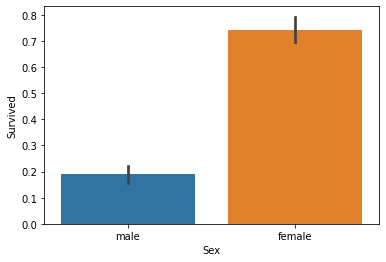

In [67]:
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

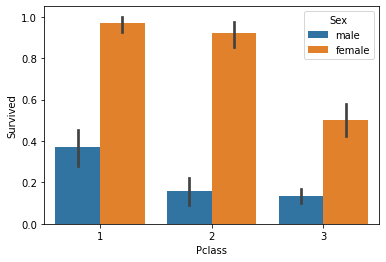

In [68]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data = titanic_df)

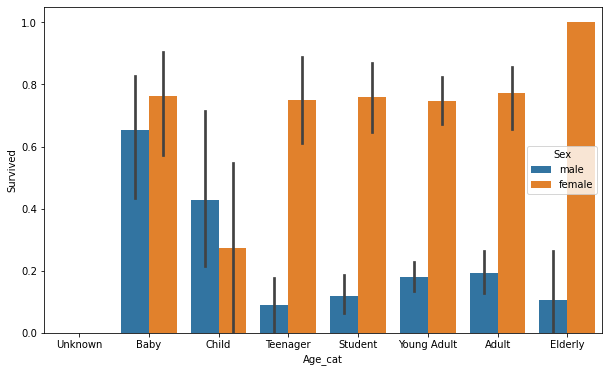

In [71]:
import matplotlib.pyplot as plt

def get_cate(age):
    cat = ''
    if age <= -1 : cat = "Unknown"
    elif age <=5 : cat = 'Baby'
    elif age <=12 : cat = "Child"
    elif age <= 18 : cat = 'Teenager'
    elif age <=25 : cat='Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

plt.figure(figsize=(10,6))
grp_names = ["Unknown",'Baby', "Child",'Teenager','Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df["Age"].apply(lambda x : get_cate(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', order=grp_names, data=titanic_df)
titanic_df.drop("Age_cat", axis=1, inplace=True)

In [76]:
titanic_df[["Sex"]].value_counts()
# titanic_df[["Cabin"]].value_counts()
# titanic_df[["Embarked"]].value_counts()

Sex   
male      577
female    314
dtype: int64

In [81]:
# LabelEncoding으로 문자열 카테고리 피처를 숫자형으로 변환하기

from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ["Sex","Cabin","Embarked"]
    
    for feature in features :
        cate_dat = dataDF[feature]
        encoder = LabelEncoder()
        encoder.fit(cate_dat)
        dataDF[feature+"_cat"] = encoder.transform(cate_dat)
        
        print(feature)
        print(encoder.classes_)
        print(encoder.transform(encoder.classes_))
        print()
    
    return dataDF

# dataDF = titanic_df.copy()
# cate_dat = dataDF["Sex"]

# encoder = LabelEncoder()
# encoder.fit(cate_dat)
# labels = encoder.transform(cate_dat)

# dataDF["Sex_cat"]= labels
# print(encoder.classes_)
# print(encoder.transform(encoder.classes_))
# dataDF.head()

titanic_encode_df = encode_features(titanic_df)
titanic_encode_df

Sex
['female' 'male']
[0 1]

Cabin
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
[0 1 2 3 4 5 6 7 8]

Embarked
['C' 'N' 'Q' 'S']
[0 1 2 3]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cat,Cabin_cat,Embarked_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,1,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,0,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,0,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,1,7,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,0,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,0,7,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,1,2,0


In [91]:
# 전처리 과정 함수로 만들기

# 결측치처리
def fillna(df):
    df['Age'].fillna(df["Age"].mean(), inplace=True) # Age 평균값 넣어주기
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna("N", inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 필요 없는 열 삭제 - PassengerId, Name, Ticket
def drop_features(df):
    df.drop(['PassengerId',"Name", "Ticket"], axis=1, inplace=True)
    return df

# 라벨인코딩 - Cabin, Sex, Embarked 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    
    features = ['Cabin', "Sex",'Embarked']
    for feature in features :
        encoder = LabelEncoder()
        encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
        
        print(feature)
        print(encoder.classes_)
        print(encoder.transform(encoder.classes_))
        print()
        
    return df

# 전처리 진행
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df


In [92]:
# 피처 데이터 세트와 레이블 세트 추출
titanic_df = pd.read_csv("./titanic_train.csv")
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)
X_titanic_df.head()

Cabin
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
[0 1 2 3 4 5 6 7 8]

Sex
['female' 'male']
[0 1]

Embarked
['C' 'N' 'Q' 'S']
[0 1 2 3]



,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [93]:
# 테스트 데이터 세트 추출
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)


#### 알고리즘 종류 및 클래스
- 결정트리 DecisionTreeClassifier
- 랜덤포레스트 RandomForestClassifier
- 로지스틱 회귀 LogisticRegression

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(random_state=11)
rfor = RandomForestClassifier(random_state =11)
lreg = LogisticRegression()

# DecisionTree
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)
dt_acc = accuracy_score(y_test, pred)
print(dt_acc)


# RandomForest
rfor.fit(X_train, y_train)
pred = rfor.predict(X_test)
rf_acc = accuracy_score(y_test, pred)
print(rf_acc)


# Logistic Regression
lreg.fit(X_train,y_train)
pred = lreg.predict(X_test)
lr_acc = accuracy_score(y_test, pred)
print(lr_acc)


0.7877094972067039
0.8547486033519553
0.8491620111731844


In [107]:
# kfold 이용하기

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_cnt, (train_idx, test_idx) in enumerate(kfold.split(X_titanic_df)):
        
        X_train, X_test = X_titanic_df.values[train_idx], X_titanic_df.values[test_idx]
        y_train, y_test = y_titanic_df.values[train_idx], y_titanic_df.values[test_idx]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc = accuracy_score(y_test, pred)
        scores.append(acc)
        
        print("{}차 검증 정확도 : {}".format(iter_cnt, acc))
    
    mean_score = np.mean(scores)
    print("평균 정확도 : {}".format(mean_score))
    
exec_kfold(dtree, folds=5)
print()
exec_kfold(rfor, folds=5)
print()
exec_kfold(lreg, folds=5)


0차 검증 정확도 : 0.7541899441340782
1차 검증 정확도 : 0.7808988764044944
2차 검증 정확도 : 0.7865168539325843
3차 검증 정확도 : 0.7696629213483146
4차 검증 정확도 : 0.8202247191011236
평균 정확도 : 0.782298662984119

0차 검증 정확도 : 0.7932960893854749
1차 검증 정확도 : 0.8089887640449438
2차 검증 정확도 : 0.8370786516853933
3차 검증 정확도 : 0.7752808988764045
4차 검증 정확도 : 0.8595505617977528
평균 정확도 : 0.8148389931579938

0차 검증 정확도 : 0.8044692737430168
1차 검증 정확도 : 0.7808988764044944
2차 검증 정확도 : 0.7752808988764045
3차 검증 정확도 : 0.7584269662921348
4차 검증 정확도 : 0.8258426966292135
평균 정확도 : 0.7889837423890528


In [106]:
# cross_val_score() 이용하기 - StratifiedKFold 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtree, X_titanic_df, y_titanic_df, cv=5)
for iter_cnt, acc in enumerate(scores):
    print("{}차 교차 검증 정확도 : {}".format(iter_cnt+1, acc))
    
print("평균 정확도 : {}".format(np.mean(scores)))
print()

scores = cross_val_score(rfor, X_titanic_df, y_titanic_df, cv=5)
for iter_cnt, acc in enumerate(scores):
    print("{}차 교차 검증 정확도 : {}".format(iter_cnt+1, acc))
    
print("평균 정확도 : {}".format(np.mean(scores)))
print()

scores = cross_val_score(lreg, X_titanic_df, y_titanic_df, cv=5)
for iter_cnt, acc in enumerate(scores):
    print("{}차 교차 검증 정확도 : {}".format(iter_cnt+1, acc))
    
print("평균 정확도 : {}".format(np.mean(scores)))


1차 교차 검증 정확도 : 0.7430167597765364
2차 교차 검증 정확도 : 0.7752808988764045
3차 교차 검증 정확도 : 0.7921348314606742
4차 교차 검증 정확도 : 0.7865168539325843
5차 교차 검증 정확도 : 0.8426966292134831
평균 정확도 : 0.7879291946519366

1차 교차 검증 정확도 : 0.7932960893854749
2차 교차 검증 정확도 : 0.797752808988764
3차 교차 검증 정확도 : 0.848314606741573
4차 교차 검증 정확도 : 0.7640449438202247
5차 교차 검증 정확도 : 0.8651685393258427
평균 정확도 : 0.8137153976523758

1차 교차 검증 정확도 : 0.7988826815642458
2차 교차 검증 정확도 : 0.7696629213483146
3차 교차 검증 정확도 : 0.7808988764044944
4차 교차 검증 정확도 : 0.7752808988764045
5차 교차 검증 정확도 : 0.797752808988764
평균 정확도 : 0.7844956374364446


In [105]:
import warnings
warnings.filterwarnings(action= 'ignore')

In [110]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dtree, param_grid=params, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print(grid_dclf.best_params_)
best_dclf = grid_dclf.best_estimator_

dpred = best_dclf.predict(X_test)
acc = accuracy_score(y_test, dpred)

print(acc)

0.8715083798882681
